# SRTP Rewrite For Mea_2_7

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SRTP_Deep_RNN_Utilize_new as srtp

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Some tips on using Utilize API

    1. befor reimport: del srtp
       
    2. read_data(filename,row_start = 0,row_end = None,column_start = 0, column_end = None,print_shape = True)

    3. single_line_visualize(Column,label = 'Angle1',color = 'b',line_type = 'o',markersize = 1)

    4. main_visualize(data,start,end,color = 'b',line_type = 'o',markersize = 1)

    5. print_info(data)

    6. print_y_info(data_dict)

    7. train_model(data_dict,is_new,ckptname,learning_rate,beta,epochs,ration,clustername,filenum,saver_name = None)

       return params_list = [rnn_params,emg_params,dense1_params,hidden_dense_params,dense2_params]
 
    8. verify_divid_and_join(testx,testy,start,end,params_list,beta,printout = True,Q_angle = 0.5,Q_omega = 10,R = 0.5,alpha = 0.005)

       return [RNNmse2,RNNqua]
 
    9. total_verify(params_list,data_dict,filenum,setting = 'test',start = 1000,end = 50000,Q_angle = 0.004,Q_omega = 0.04,R = 2,alpha = 0.001)

       return [RNN_MSE/total_length,RNN_QUA/total_length]
 
    10. writematrix(parameters,filename = 'parameters.txt') && write_params_list(params_list)



In [2]:
data_dict = {}
filenum = 11

## Importing Data

0 - 0:27 Walk

27 - 1:21 up

1:21 - 2:23 walk

2:23 - 2:33 down

In [8]:
data_dict['data1'] = srtp.read_data("SRTP_Mea_2_2\\train_HYC_2_7_0.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)

(14975, 8)


In [16]:
plt.xlabel?

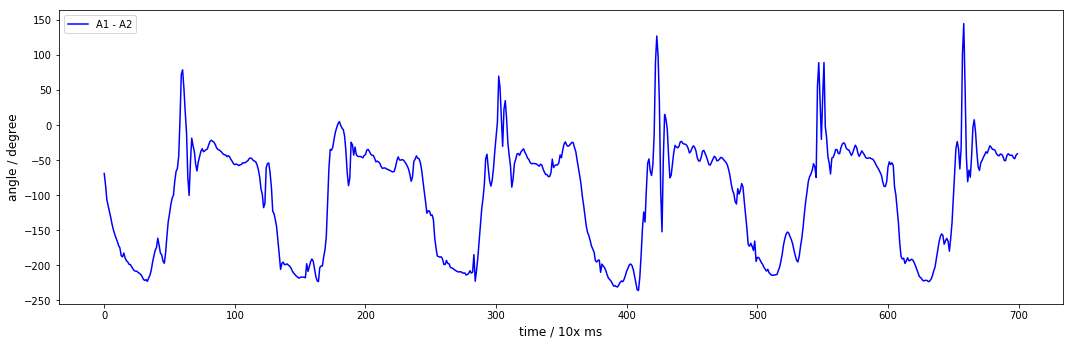

In [34]:
#srtp.main_visualize(data_dict['data1'],14000,15000,color = 'b',line_type = '-')
plt.figure(22,figsize = (18,5.4))
plt.xlabel('time / 10x ms',fontsize = 'large')
plt.ylabel('angle / degree',fontsize = 'large')
plt.plot(pd.Series(data_dict['data1'][9400:10100,0] - data_dict['data1'][9400:10100,1] ),'b-',markersize = 1,label = 'A1 - A2')
plt.legend(loc = 'upper left')
plt.show()
#srtp.single_line_visualize(data_dict['data1'][0,14300:15300],color = 'b',line_type = '-')

In [4]:
data_dict['data2'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_1.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(35283, 7)


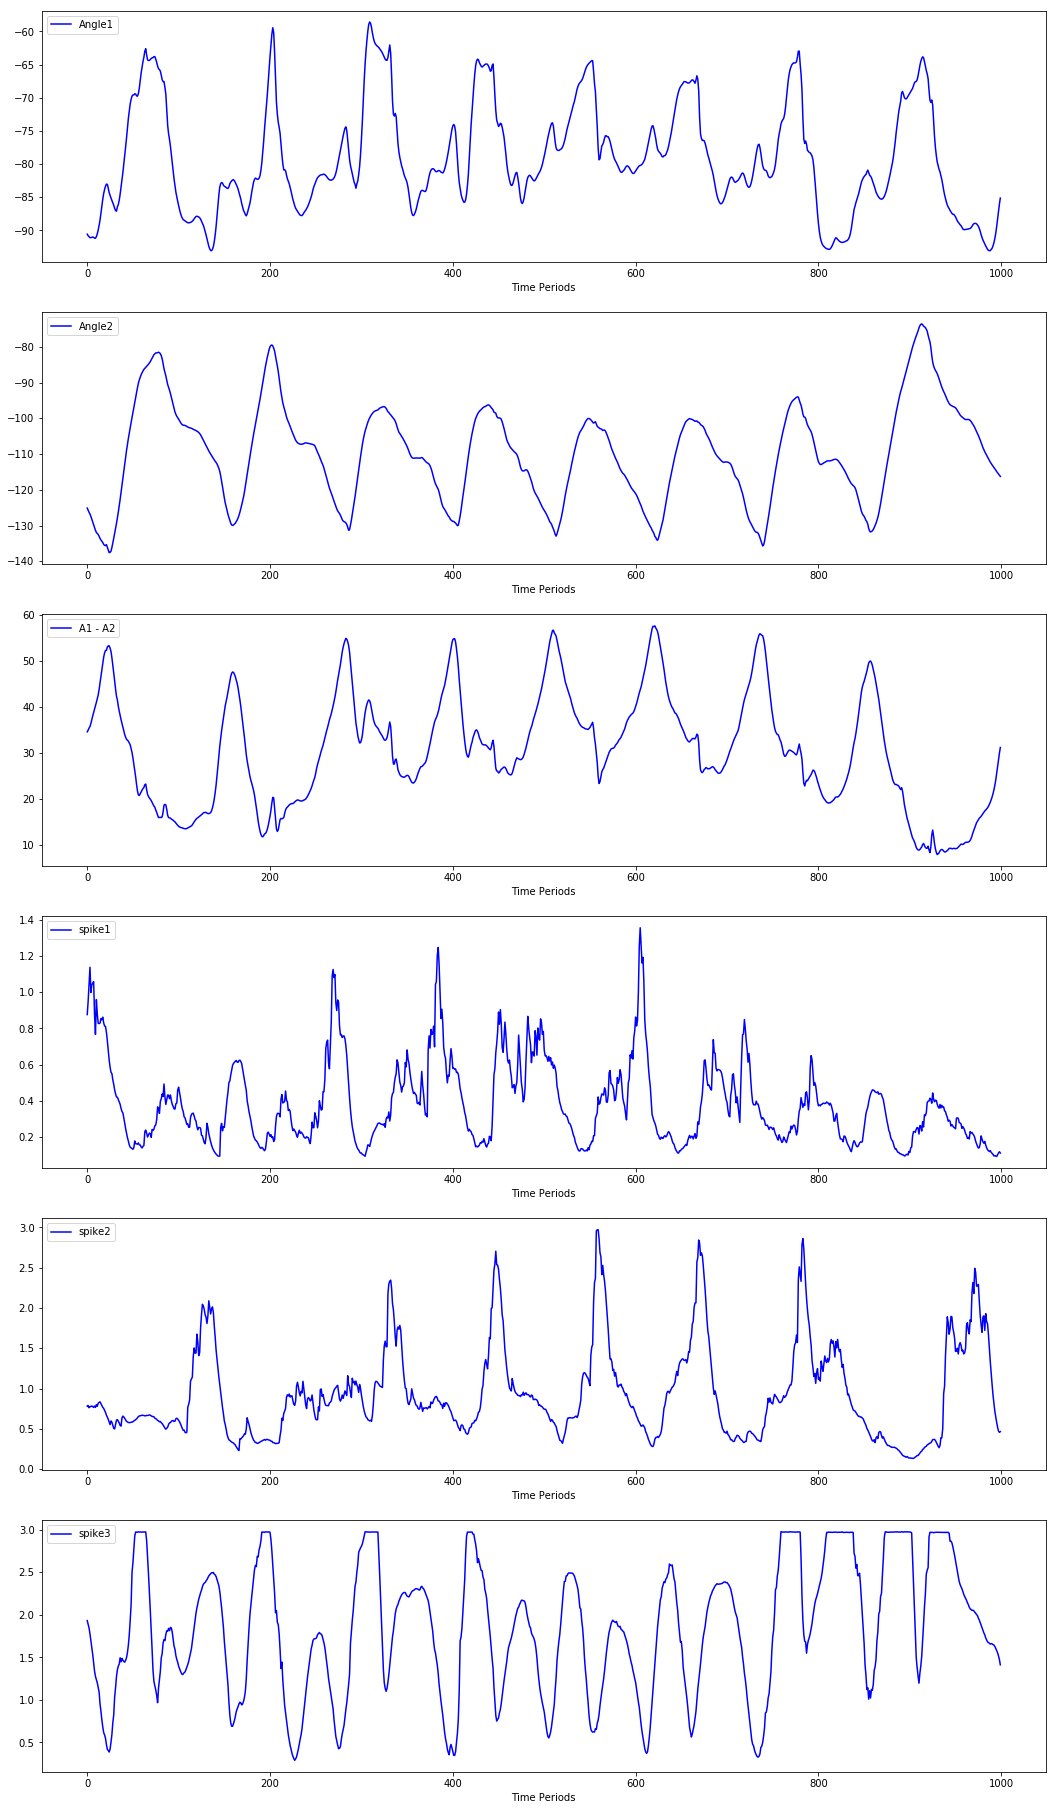

In [6]:
srtp.main_visualize(data_dict['data2'],15000,16000,color = 'b',line_type = '-')

In [5]:
data_dict['data3'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_2.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(25715, 7)


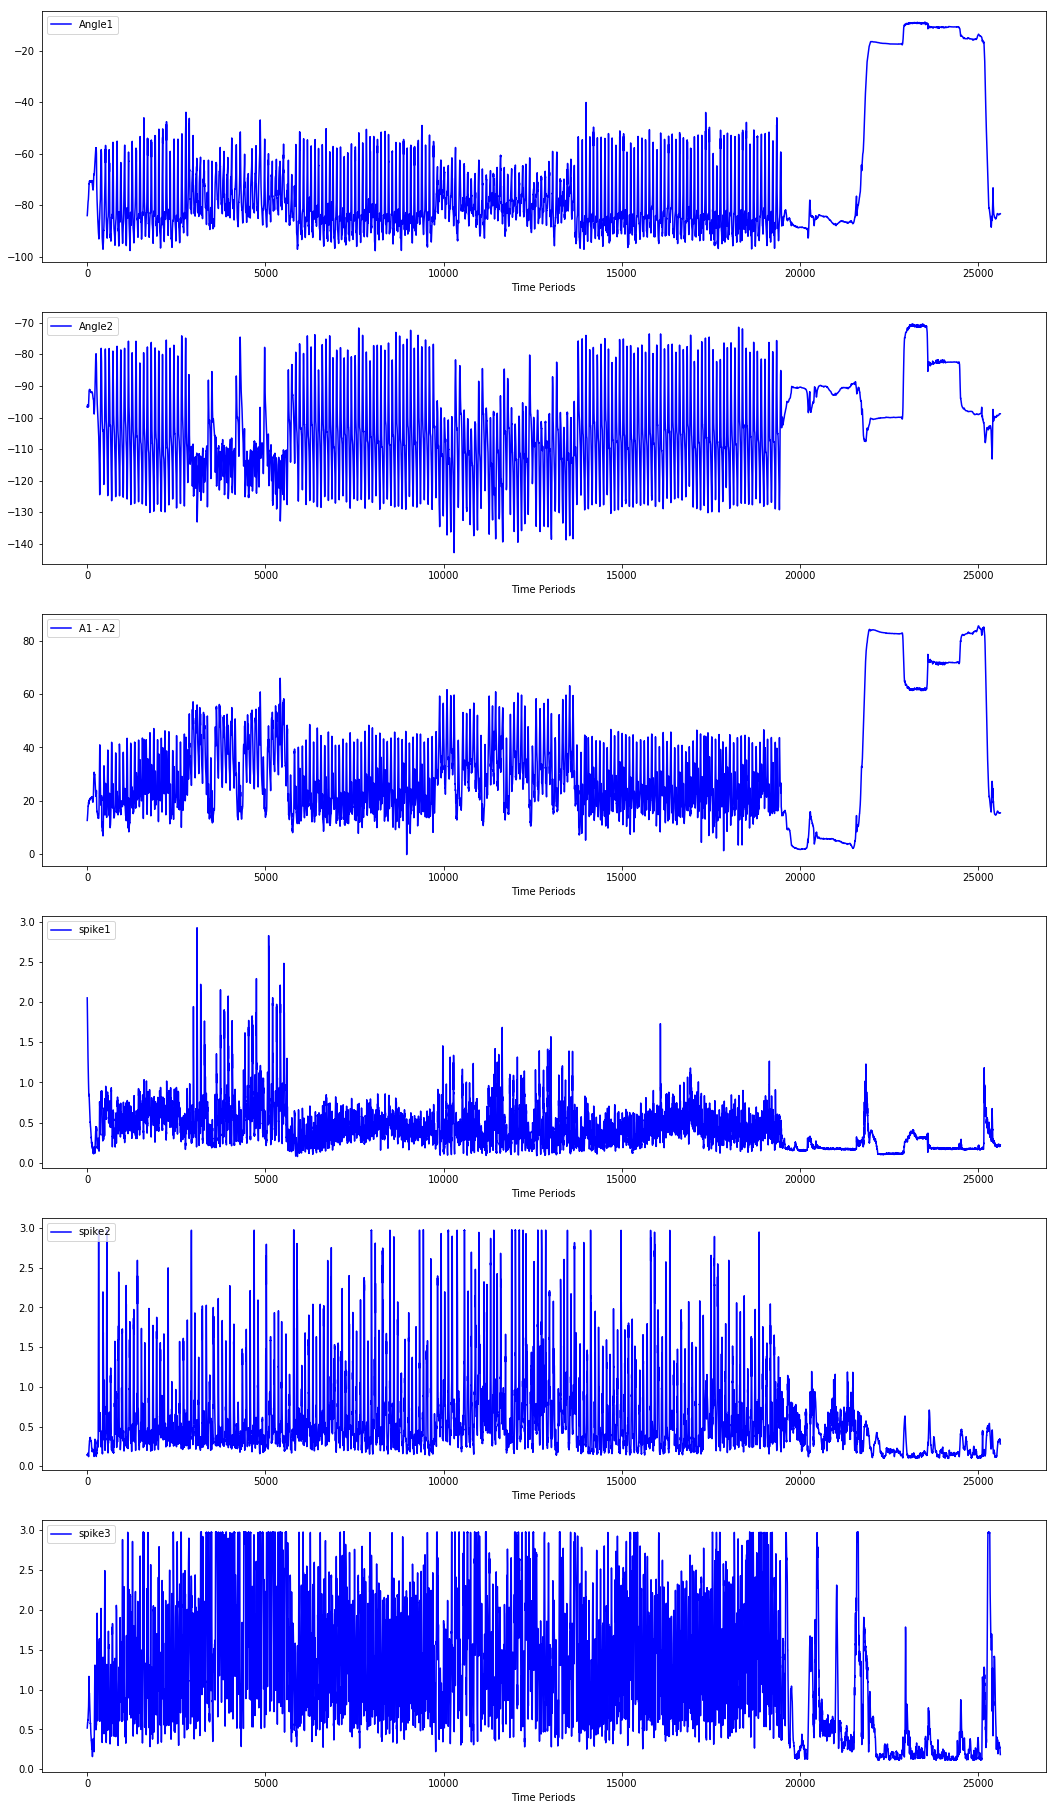

In [8]:
srtp.main_visualize(data_dict['data3'],100,None,color = 'b',line_type = '-')

In [6]:
data_dict['data4'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_3.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(28840, 7)


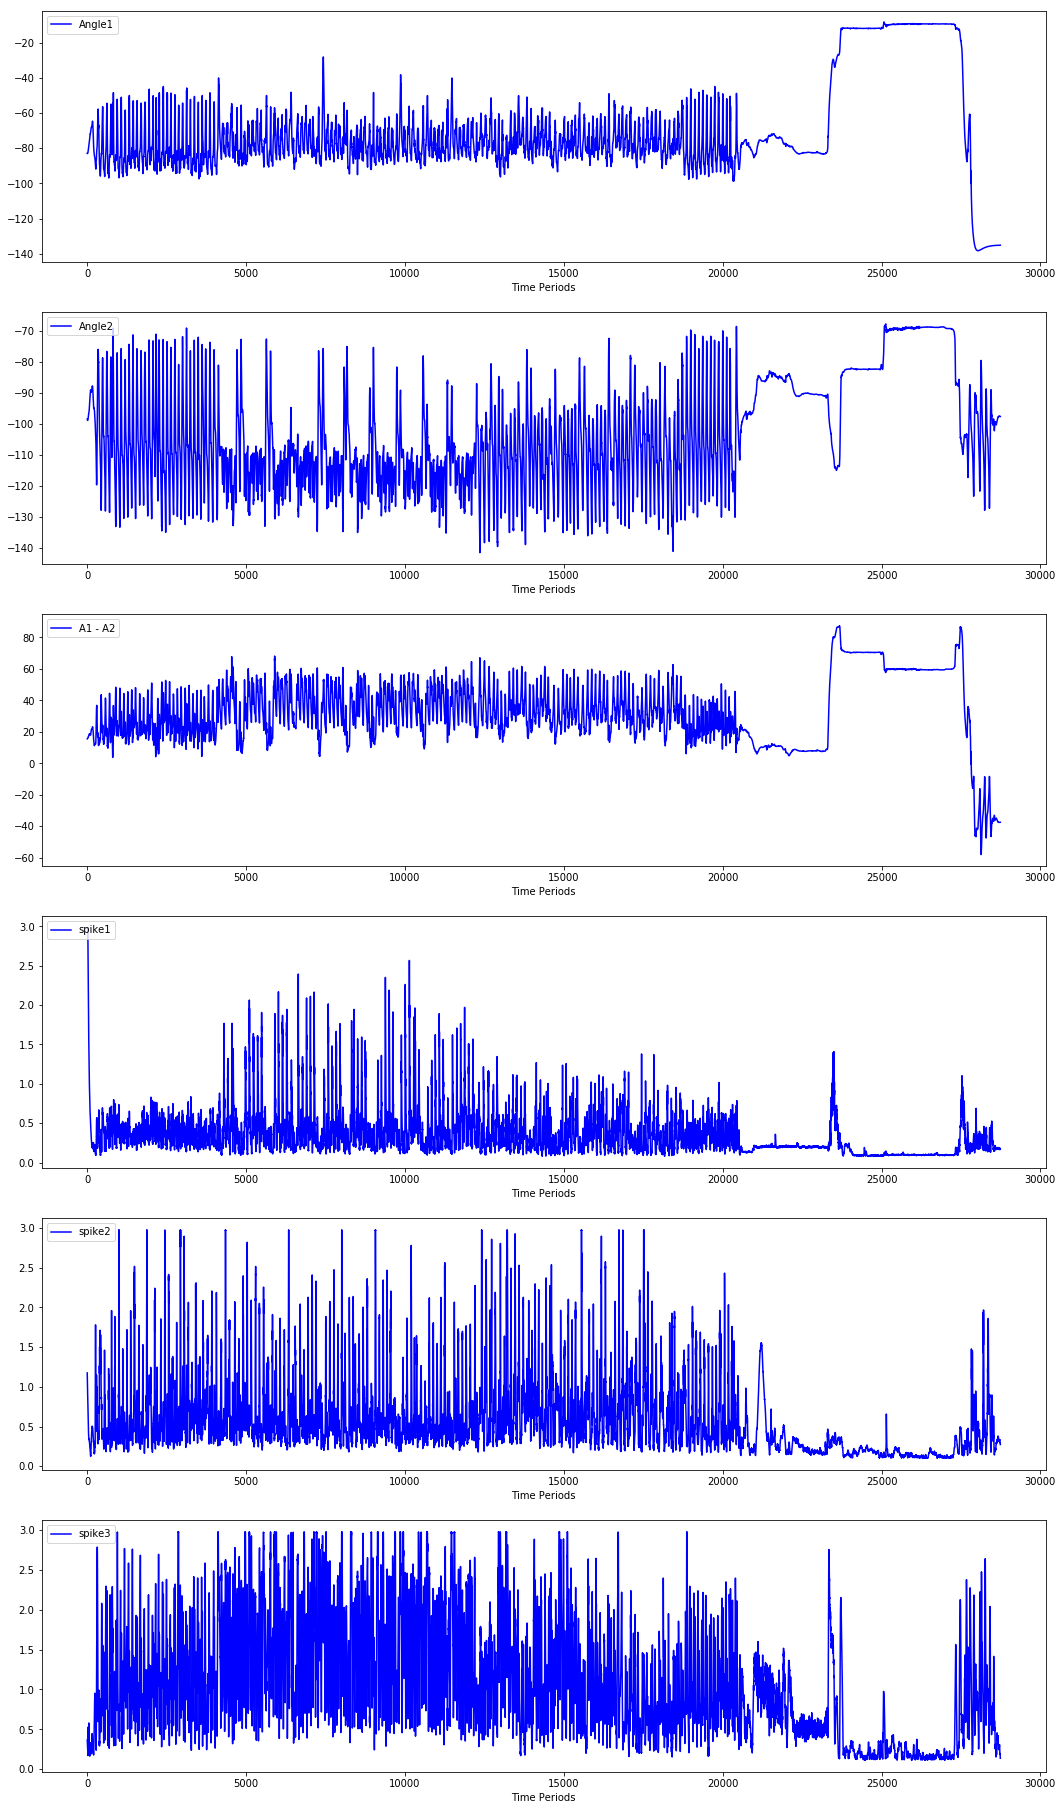

In [10]:
srtp.main_visualize(data_dict['data4'],100,None,color = 'b',line_type = '-')

In [7]:
data_dict['data5'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_4.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(23802, 7)


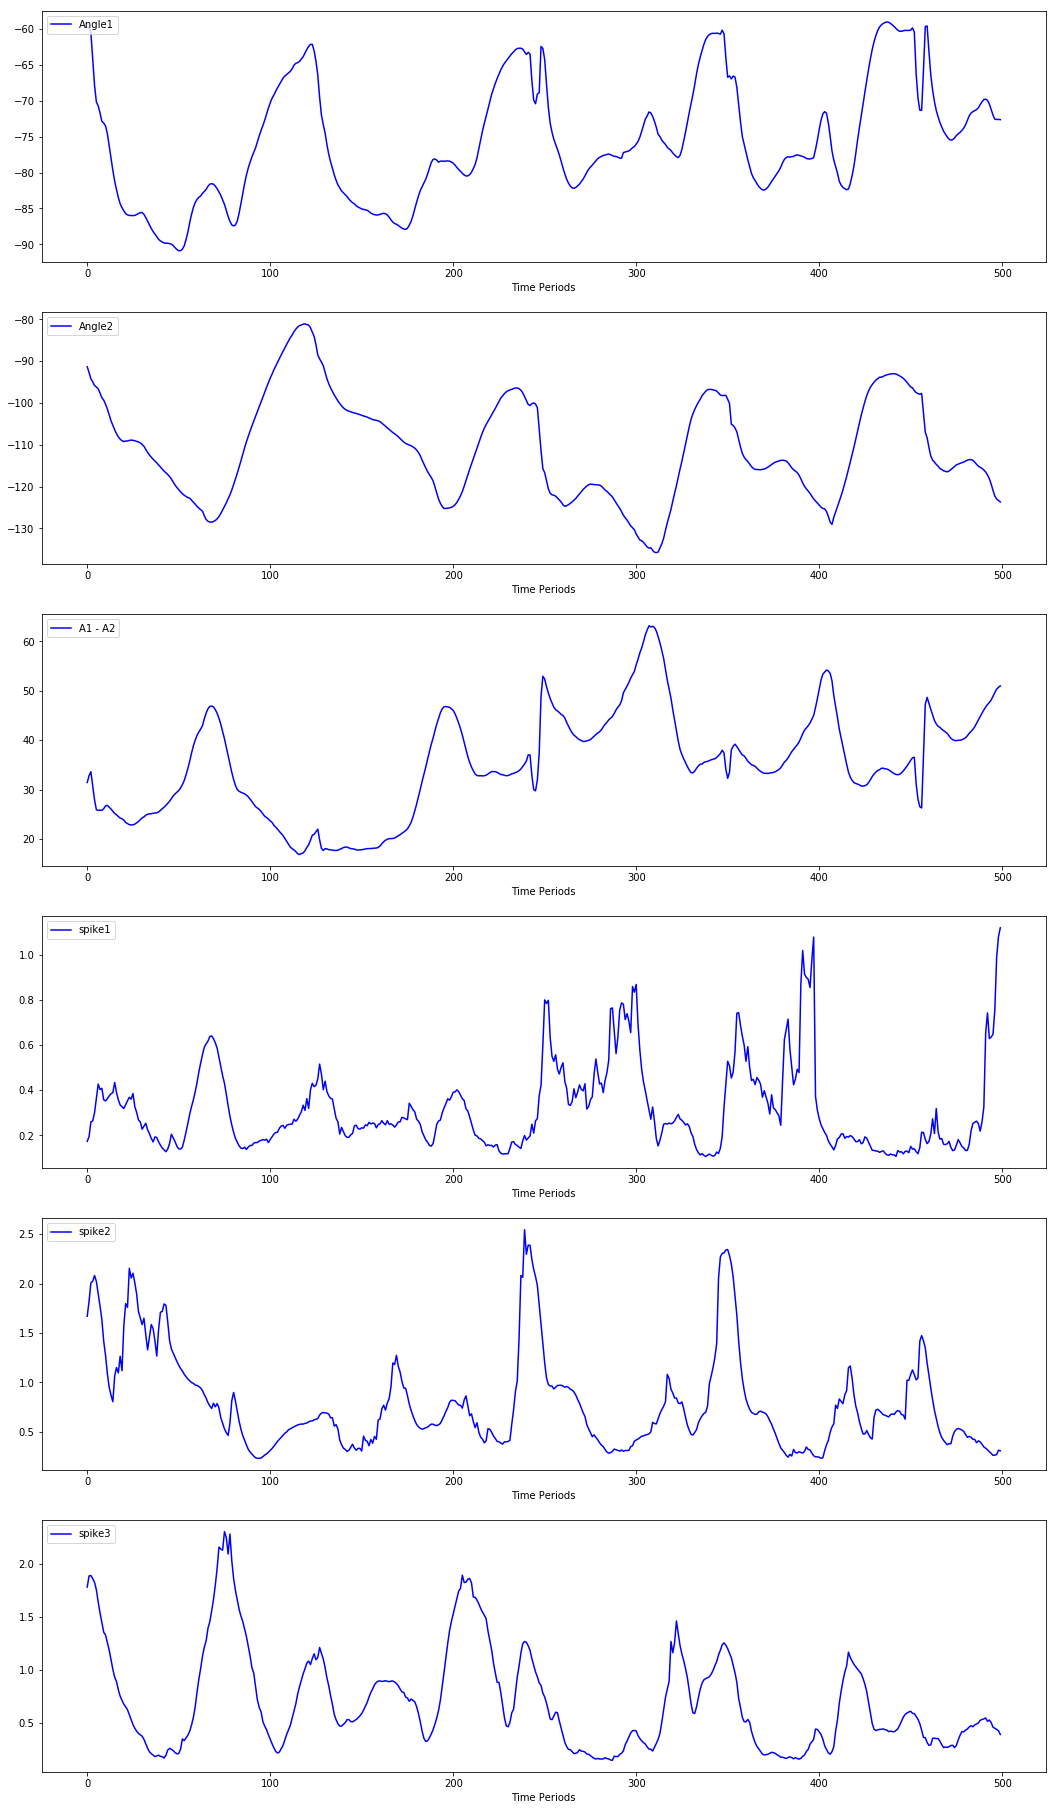

In [12]:
srtp.main_visualize(data_dict['data5'],14000,14500,color = 'b',line_type = '-')

In [8]:
data_dict['data6'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_5.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(23159, 7)


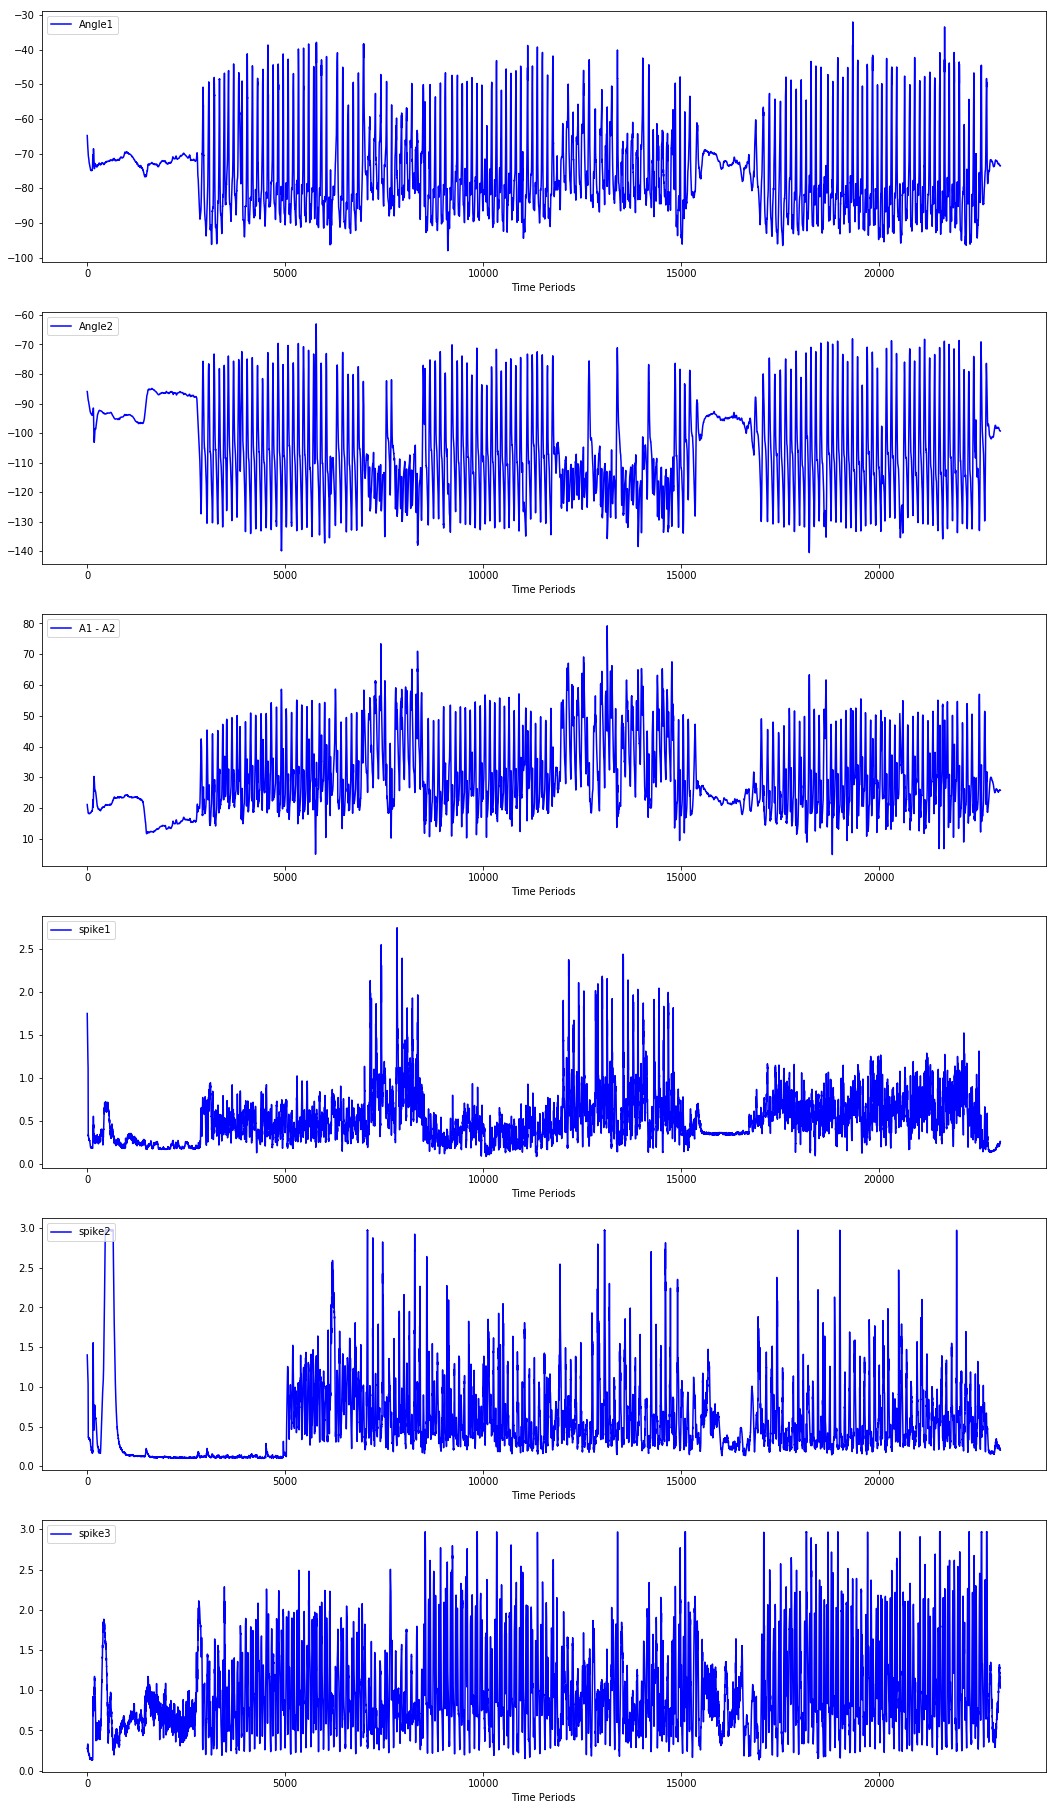

In [14]:
srtp.main_visualize(data_dict['data6'],100,None,color = 'b',line_type = '-')

In [9]:
data_dict['data7'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_6.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(25307, 7)


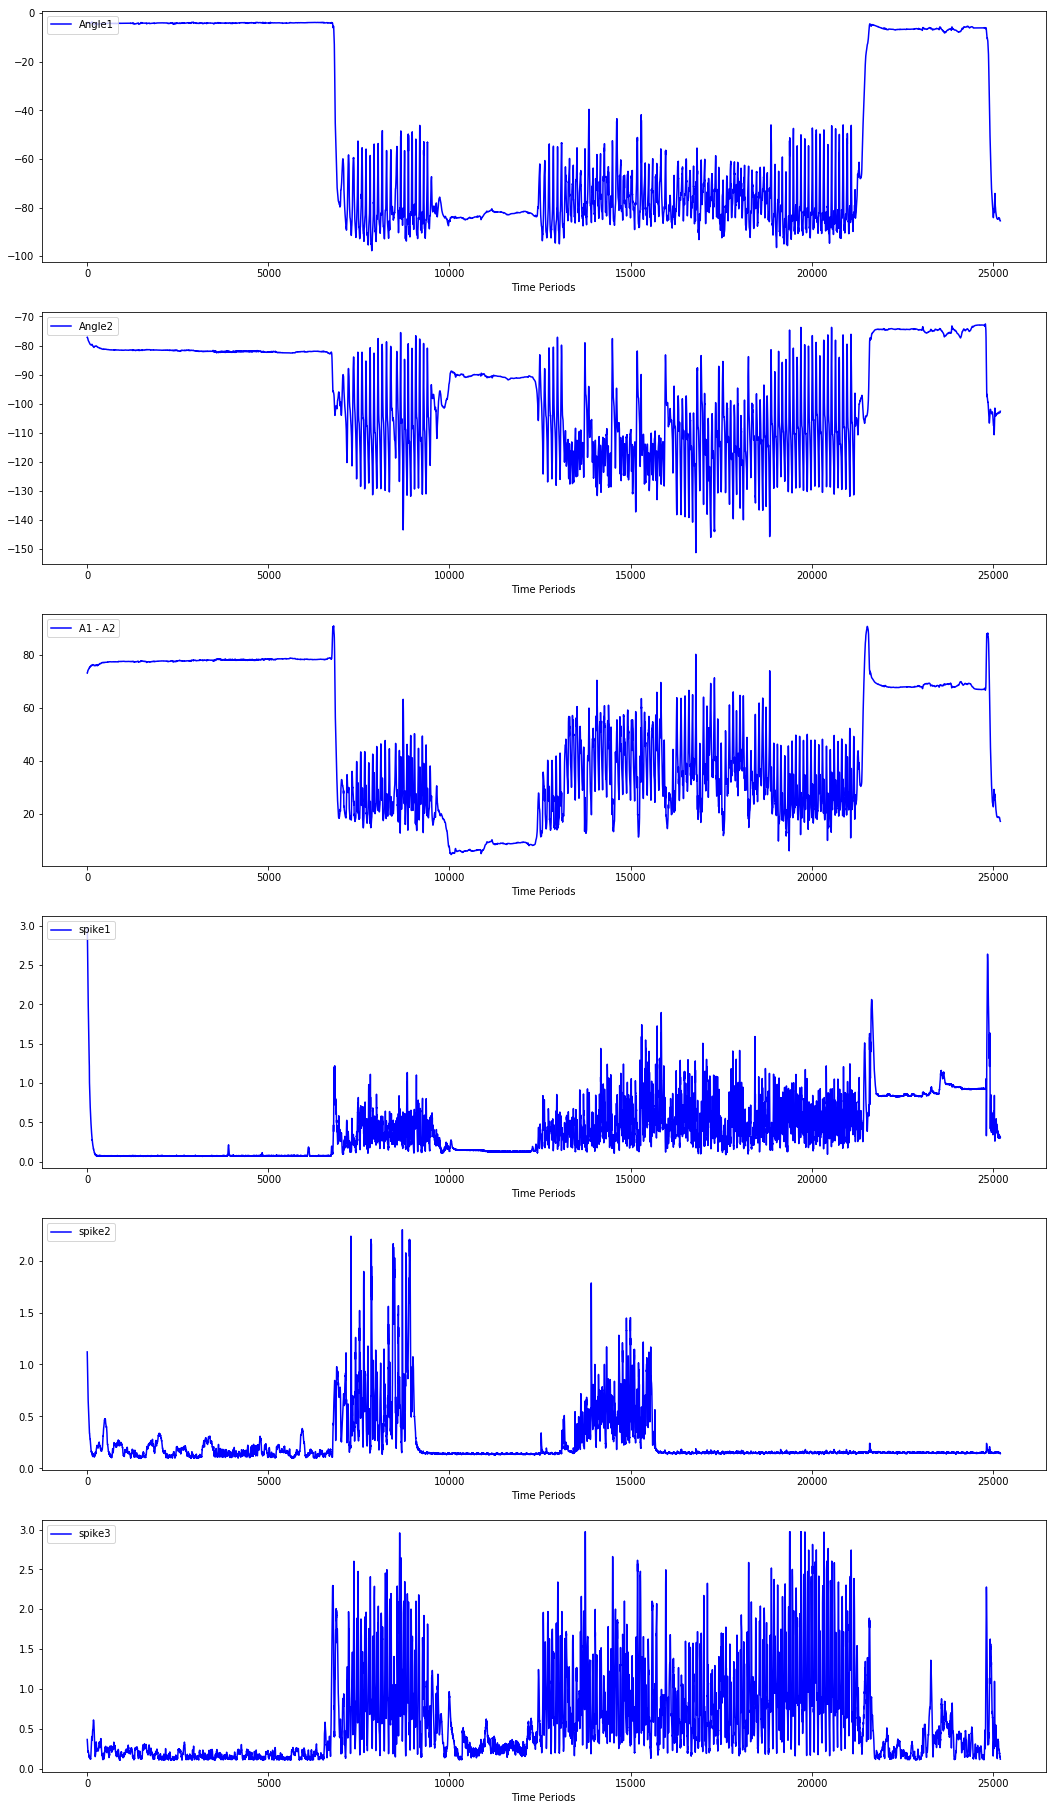

In [16]:
srtp.main_visualize(data_dict['data7'],100,None,color = 'b',line_type = '-')

In [10]:
data_dict['test8'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_7.txt"
                               ,row_start = 0,row_end = 4000,column_start = 0, column_end = 7,print_shape = True)

(4000, 7)


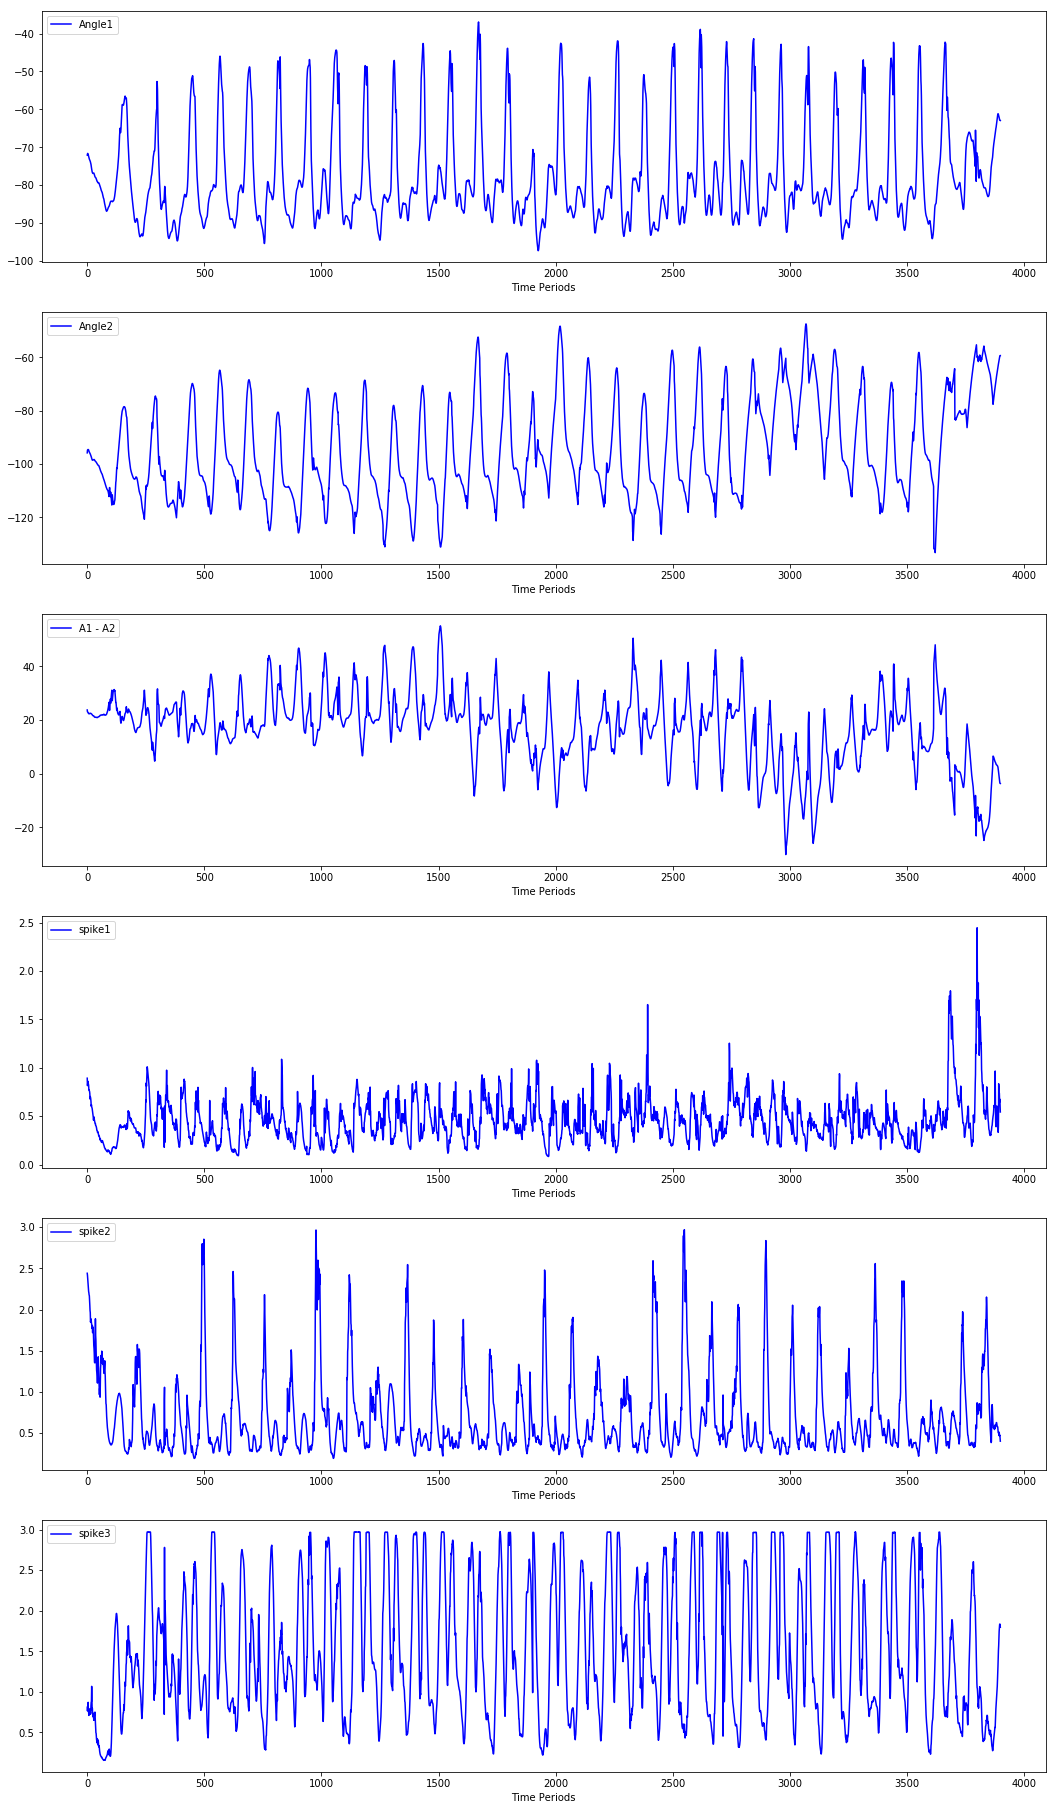

In [18]:
srtp.main_visualize(data_dict['test8'],100,None,color = 'b',line_type = '-')

In [11]:
data_dict['data8'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_8.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(31865, 7)


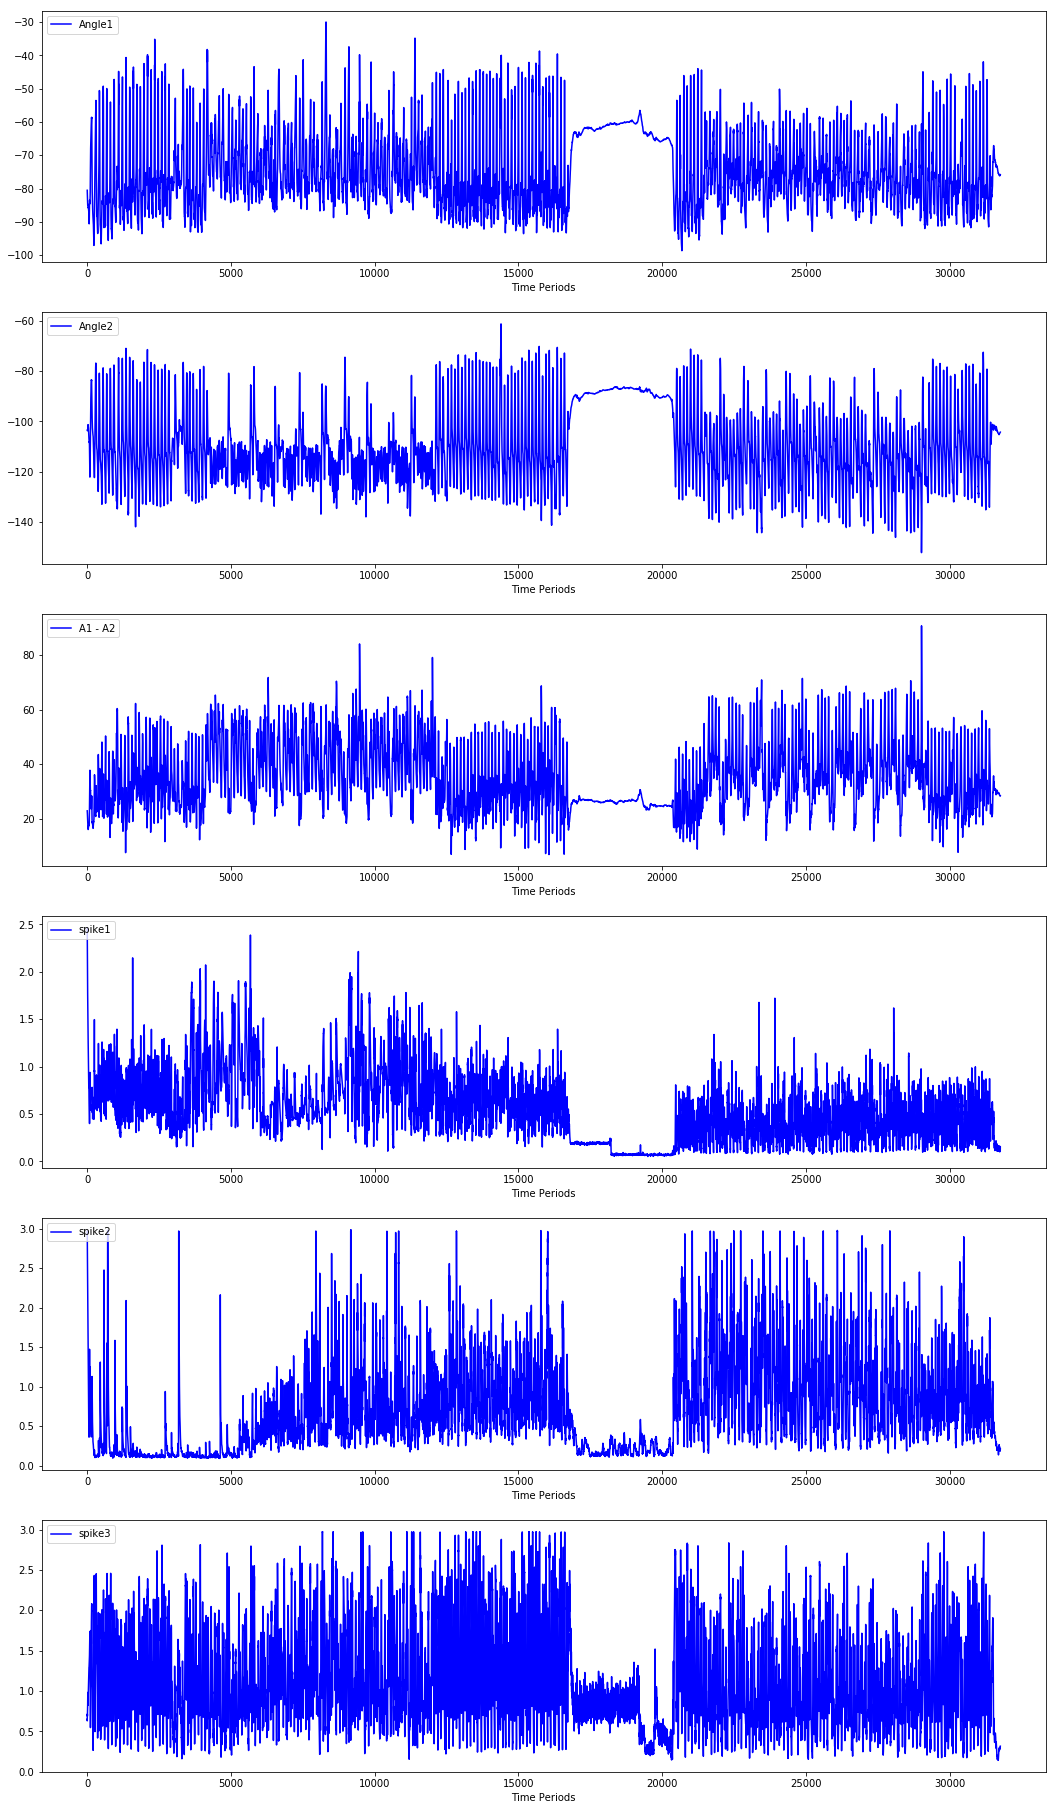

In [20]:
srtp.main_visualize(data_dict['data8'],100,None,color = 'b',line_type = '-')

In [12]:
data_dict['data9'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_9.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(24954, 7)


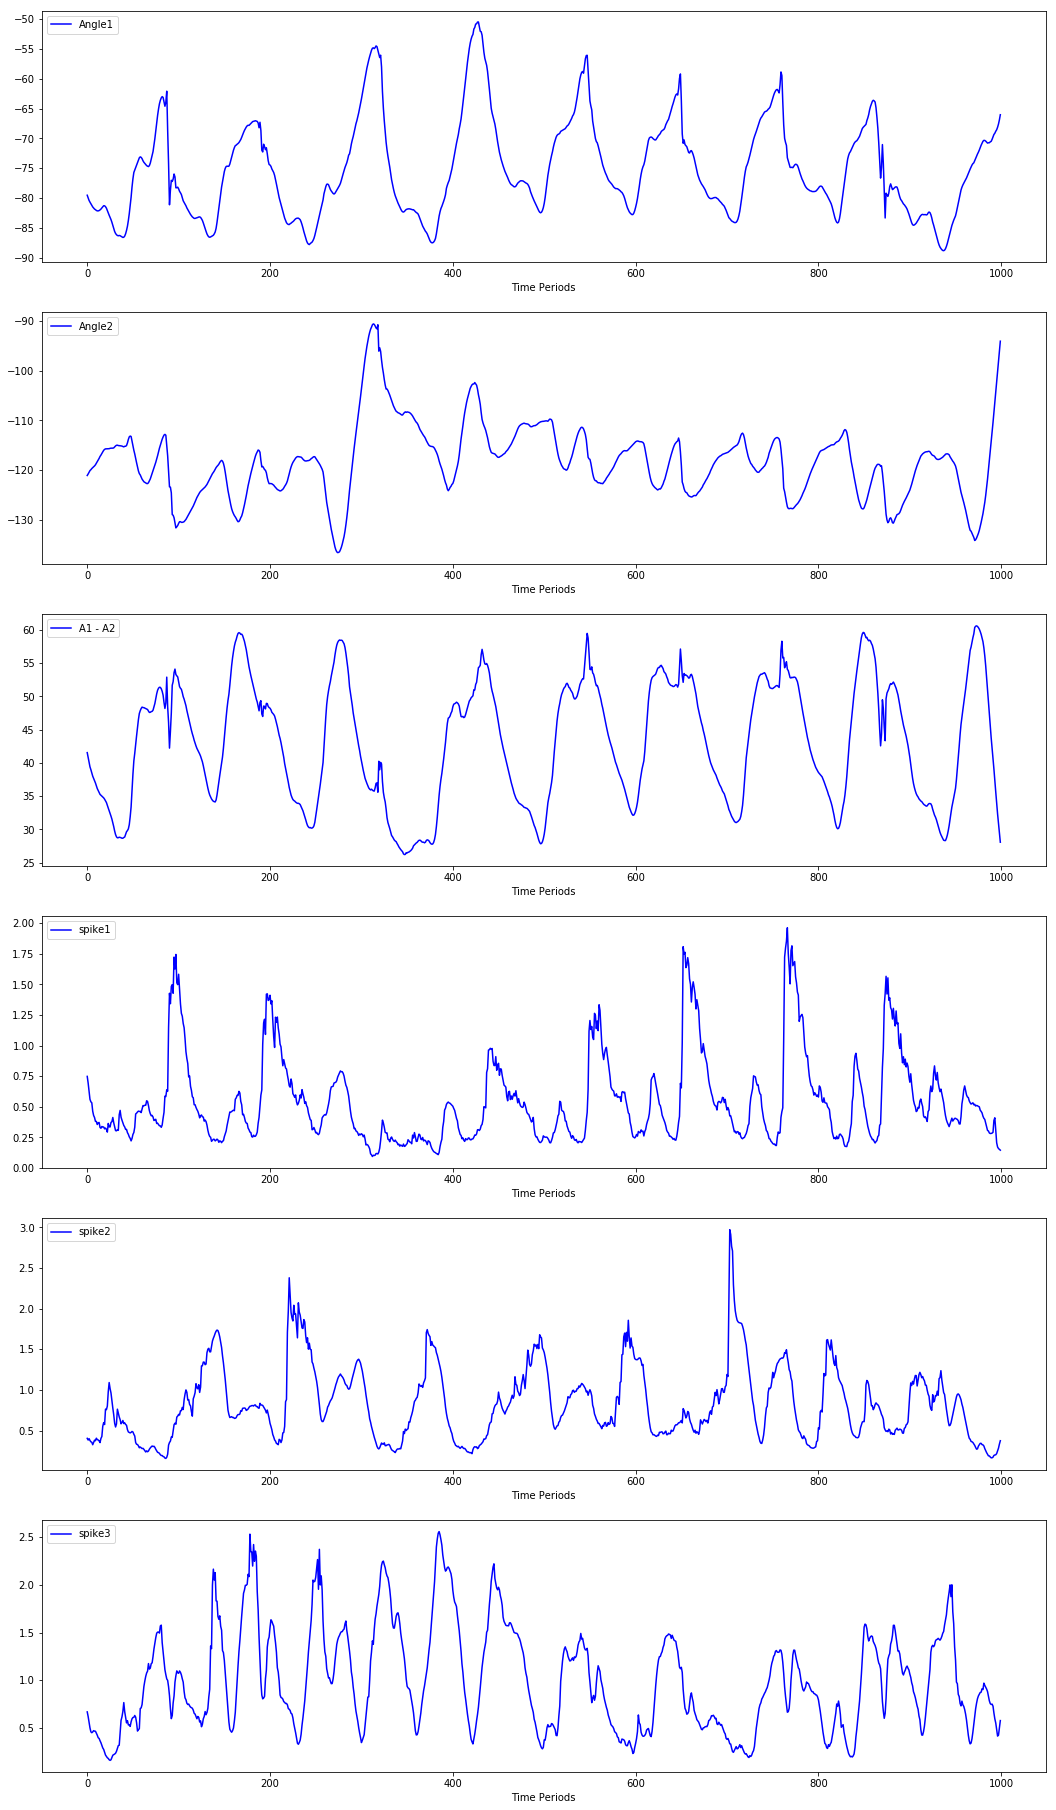

In [22]:
srtp.main_visualize(data_dict['data9'],5000,6000,color = 'b',line_type = '-')

In [13]:
data_dict['data10'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_10.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(26397, 7)


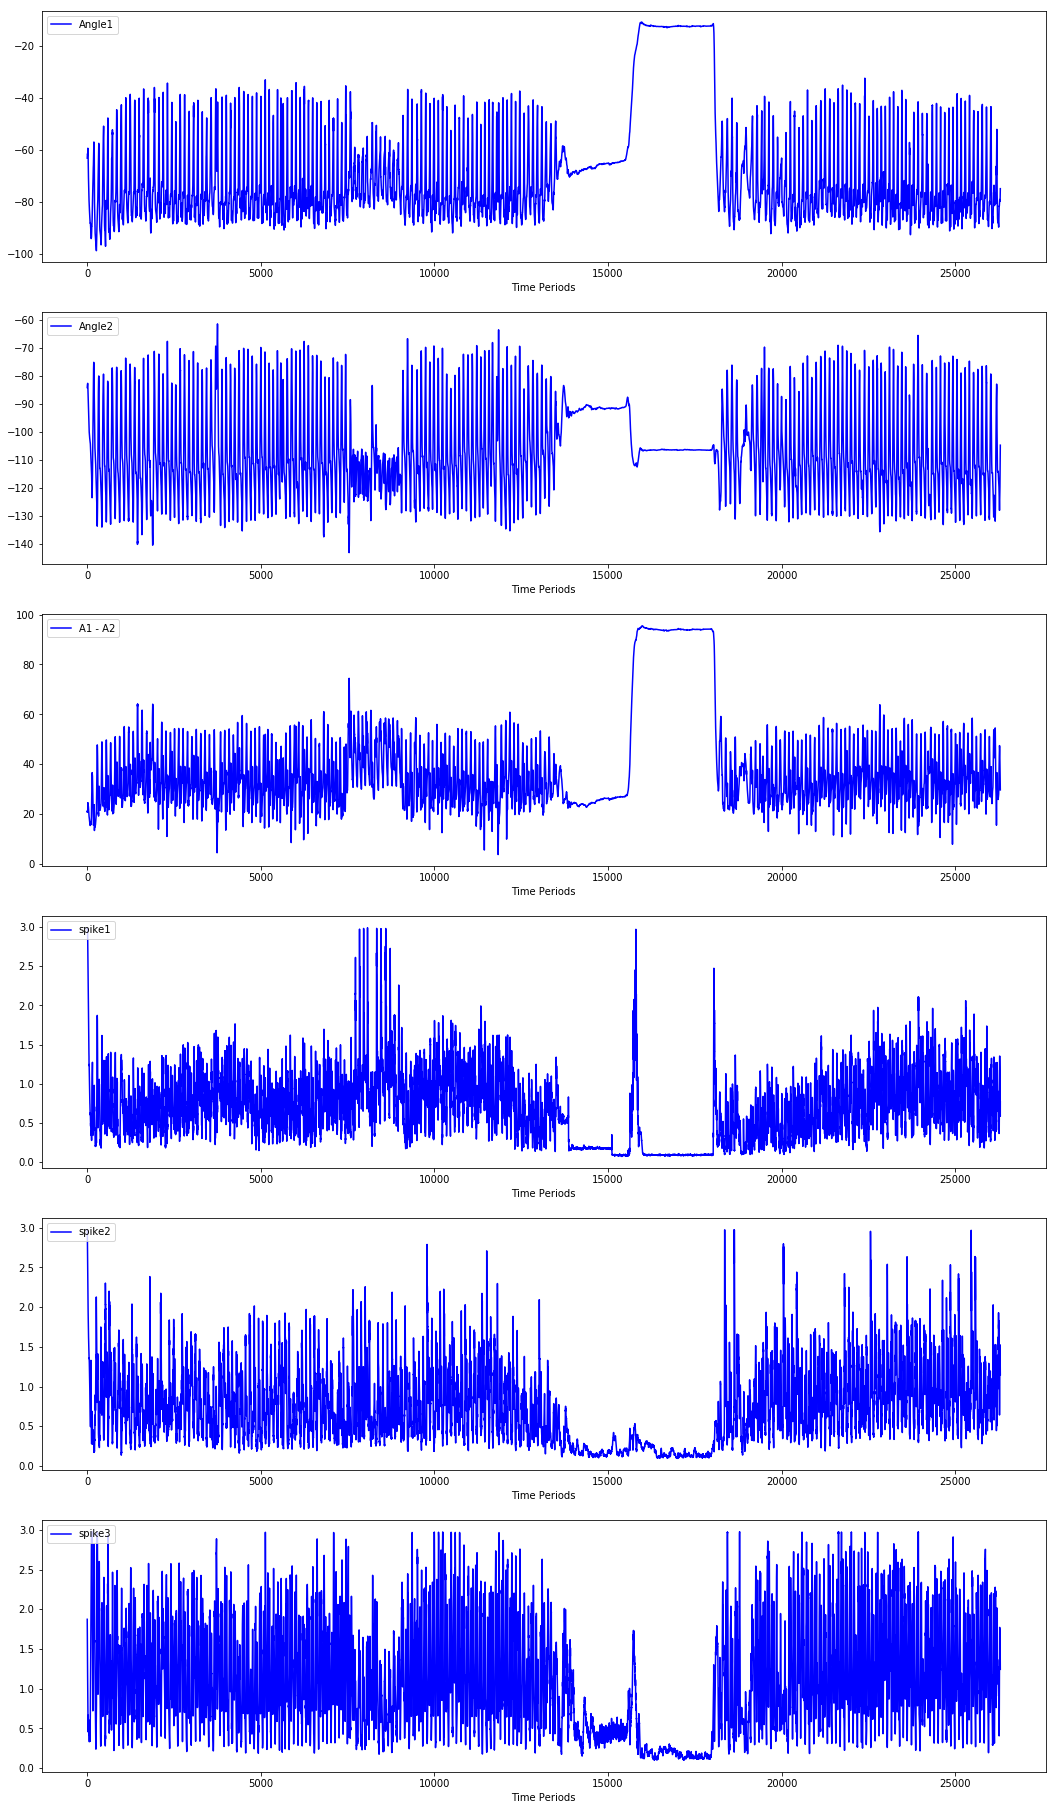

In [24]:
srtp.main_visualize(data_dict['data10'],100,None,color = 'b',line_type = '-')

In [14]:
data_dict['data11'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_11.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(31145, 7)


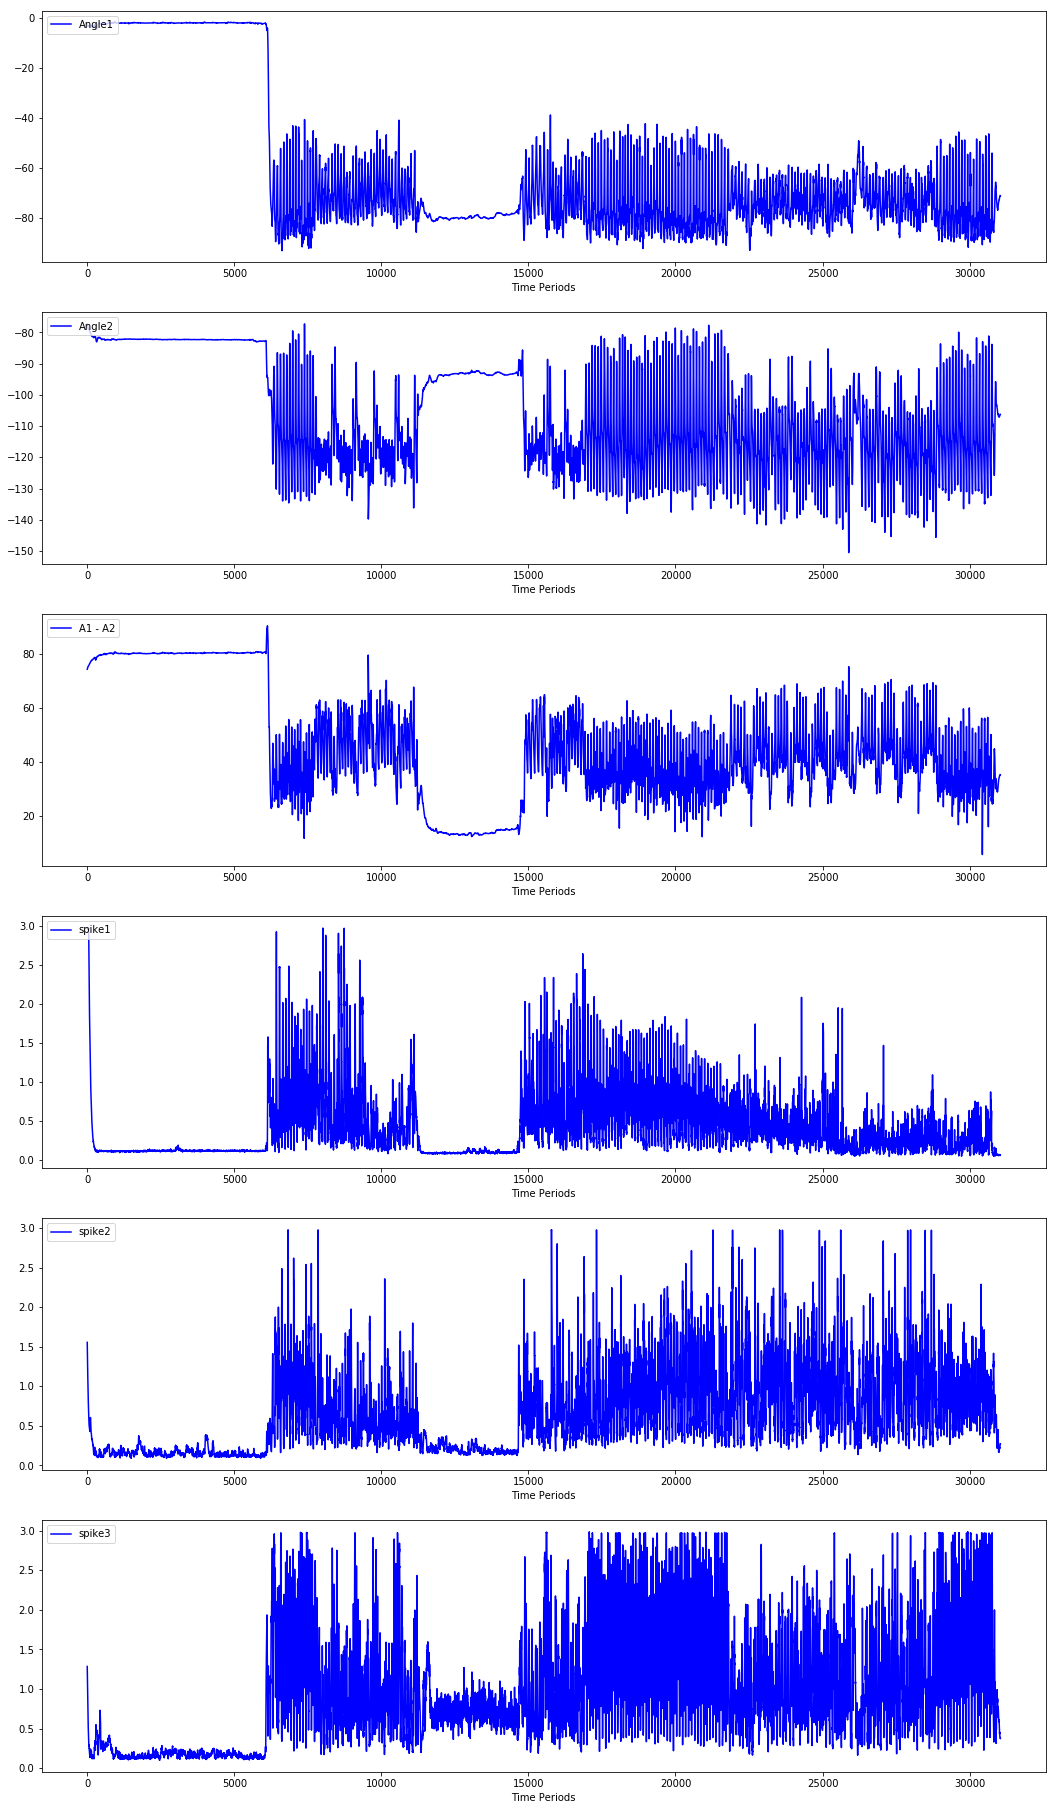

In [26]:
srtp.main_visualize(data_dict['data11'],100,None,color = 'b',line_type = '-')

## Verifying the algorithm on stm32F4

#define mean1 -80.0f
#define std1 15.0f
#define meanw1 0.0f
#define stdw1 75.0f
#define mean2 -110.0f
#define std2 15.0f
#define meanw2 0.0f
#define stdw2 90.0f


alpha = 0.001f


从 MCU_Test_2-4.txt 由 正确的算法得出

In [15]:
mcu_test3 = srtp.read_data("SRTP_Mea_2_2\\MCU_Test_2.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)

(1068, 8)


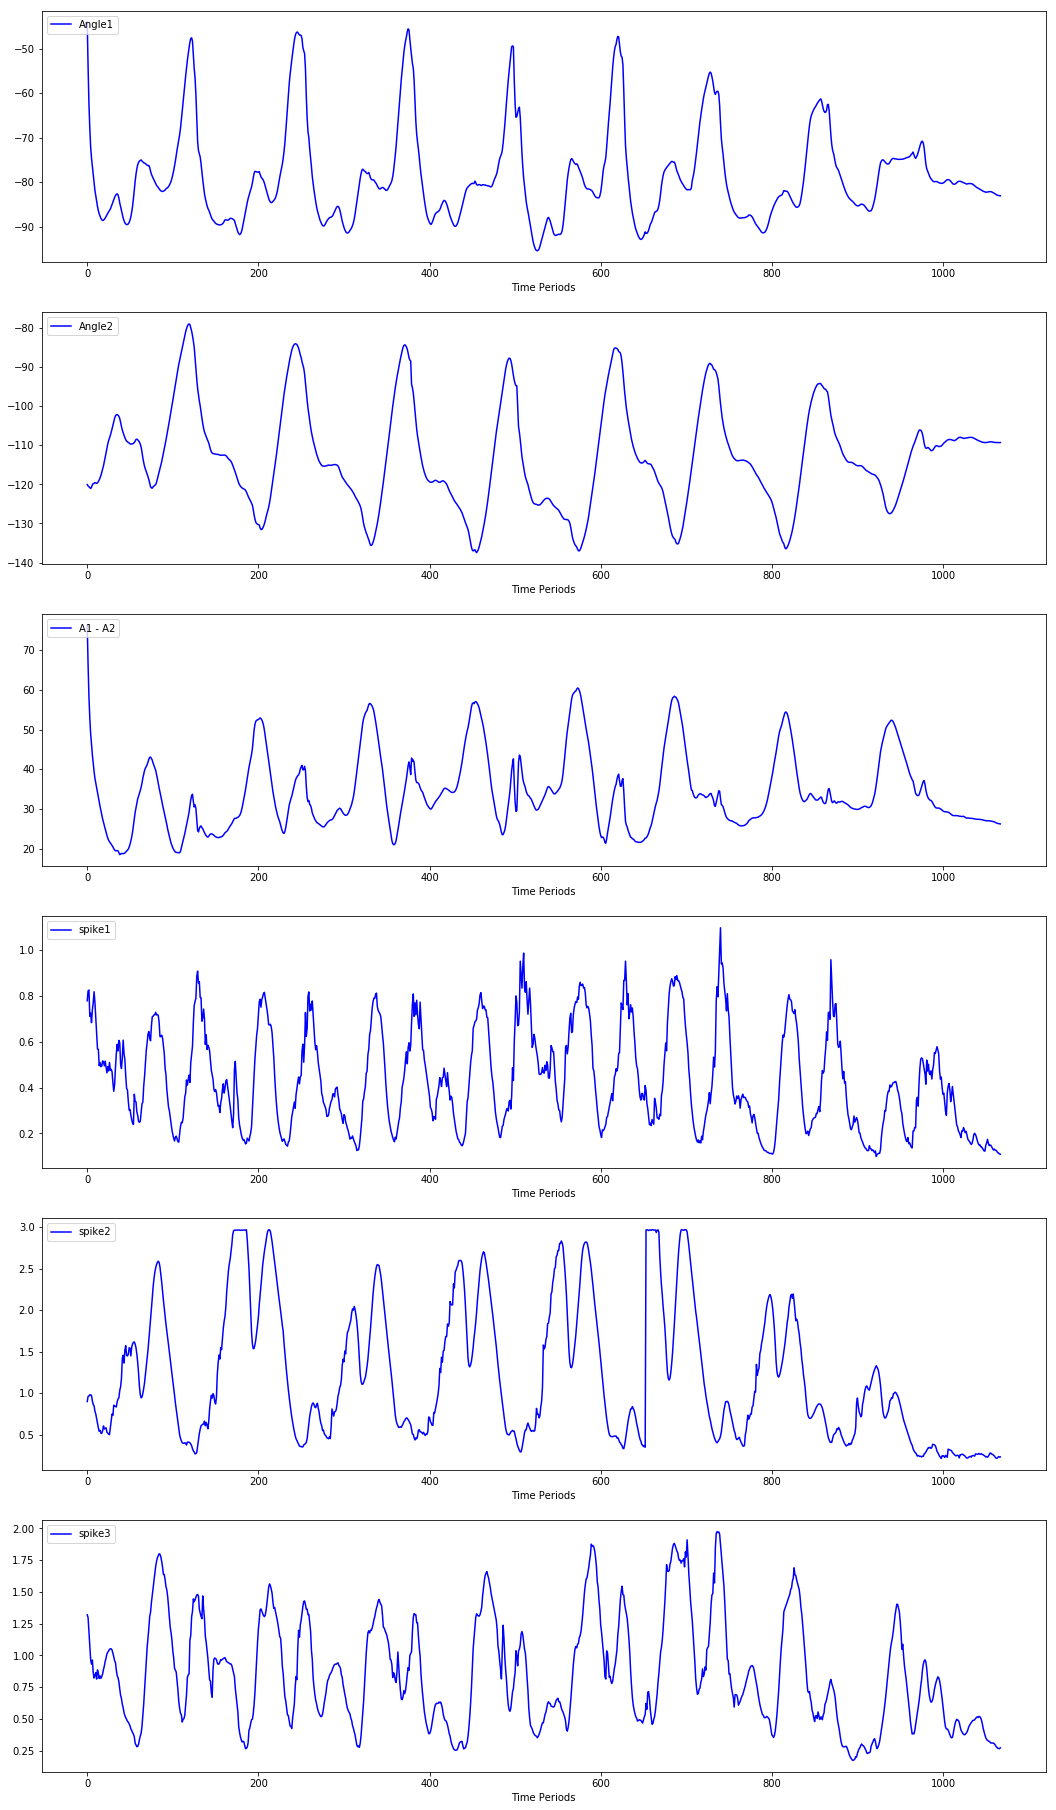

In [28]:
srtp.main_visualize(mcu_test3,0,None,color = 'b',line_type = '-')

In [16]:
start = 100
end = 50000

mcupred = mcu_test3[100:-5,7]

mcu_y = mcu_test3[100+5:,0] - mcu_test3[100+5:,2] 
mse = np.mean(np.square(mcupred[start:end] - mcu_y[start:end]))

mse

4.343033603707995

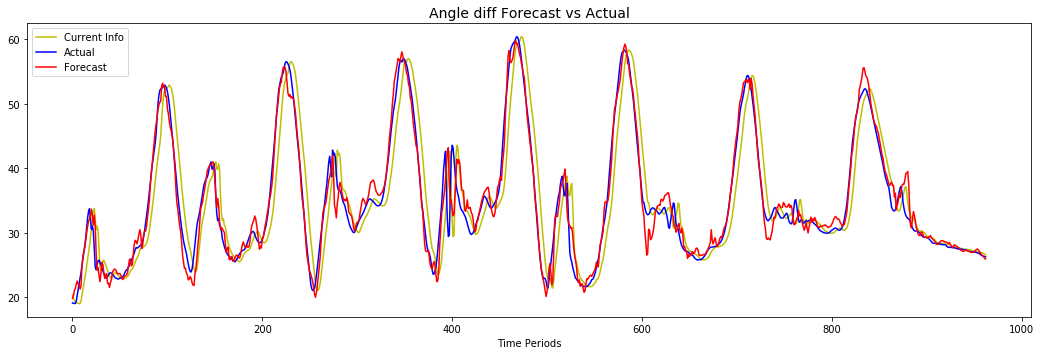

In [30]:
plt.figure(1,figsize = (18,1*5.4))
plt.title("Angle diff Forecast vs Actual",fontsize = 14)

plt.plot(pd.Series(mcu_test3[100:-5,0] - mcu_test3[100:-5,2]),'y-',markersize = 1,label = 'Current Info')
plt.plot(pd.Series(np.ravel(mcu_y)),"b-",markersize = 1,label = 'Actual')
plt.plot(pd.Series(np.ravel(mcupred)),"r-",markersize = 1,label = 'Forecast')
plt.legend(loc = "upper left")
plt.xlabel("Time Periods")
plt.show()

(15675, 8)


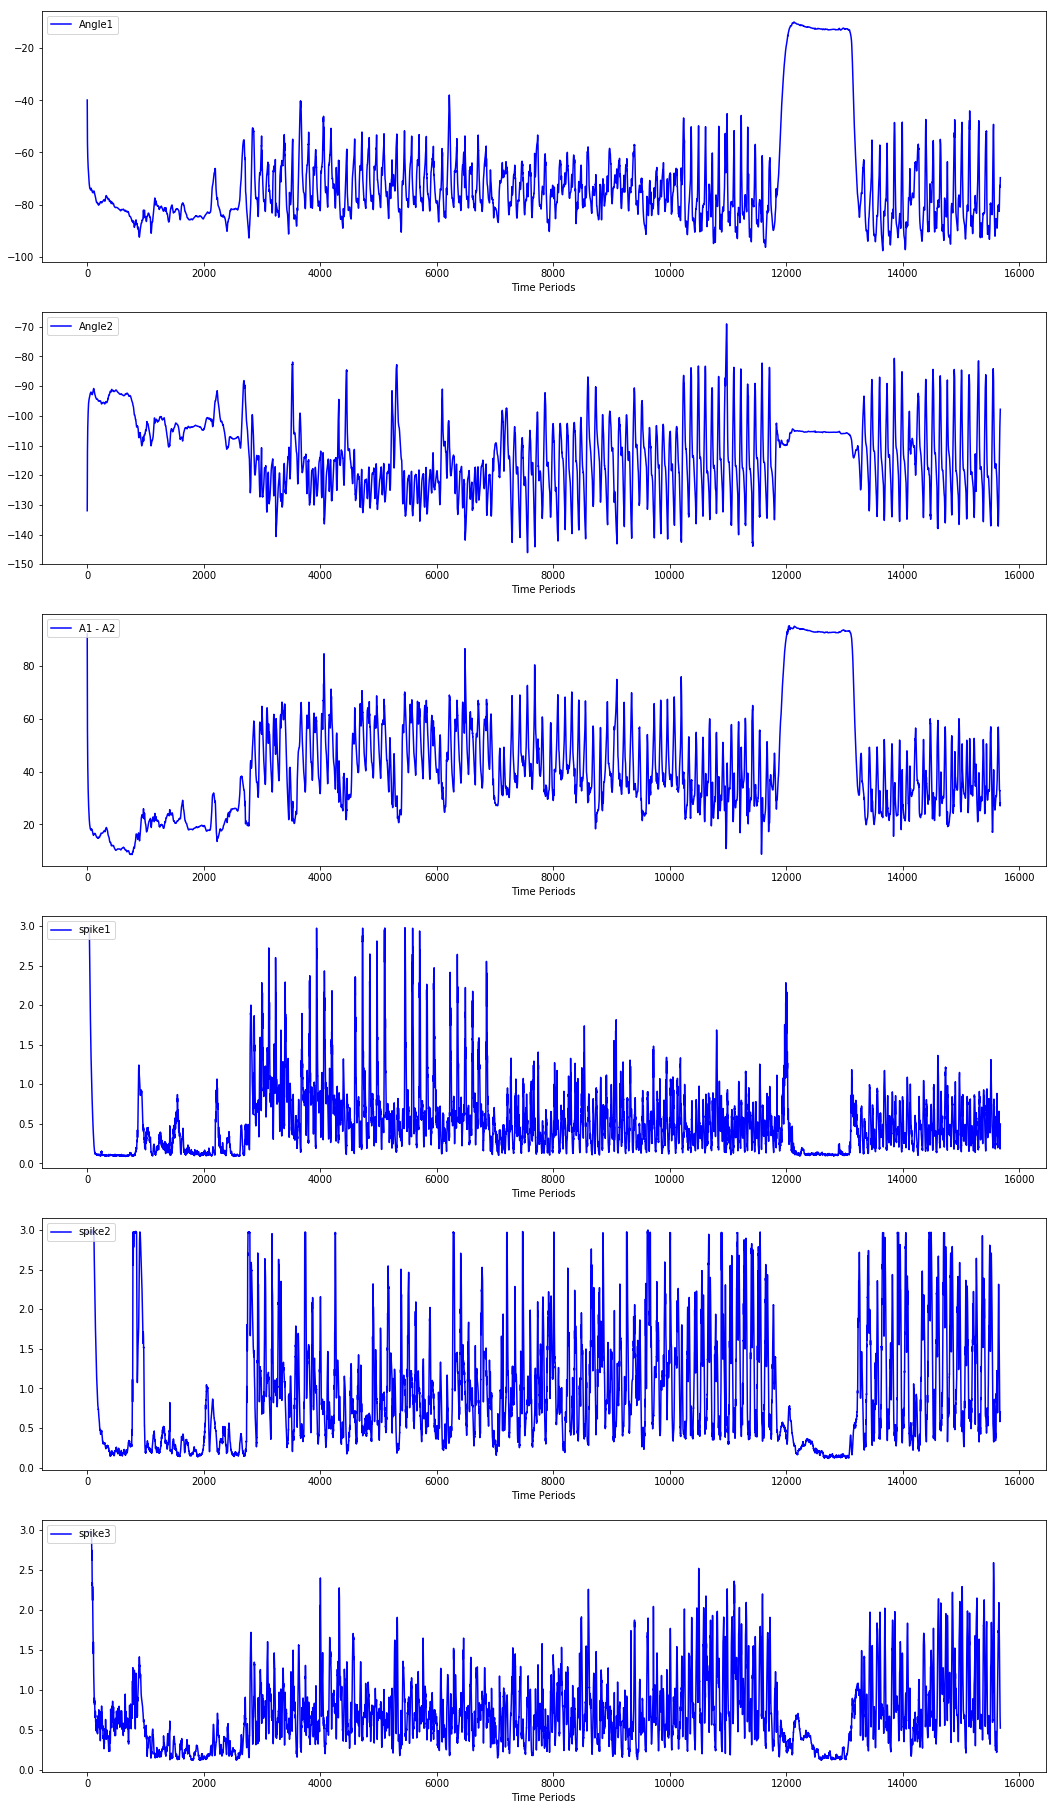

In [39]:
mcu_test4 = srtp.read_data("SRTP_Mea_2_2\\MCU_Test_3.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)
srtp.main_visualize(mcu_test4,0,None,color = 'b',line_type = '-')

MSE = 2.785451000000001 degree
Naive 1 MSE = 14.795865800000001 degree
Naive 2 MSE = 11.0250543955 degree


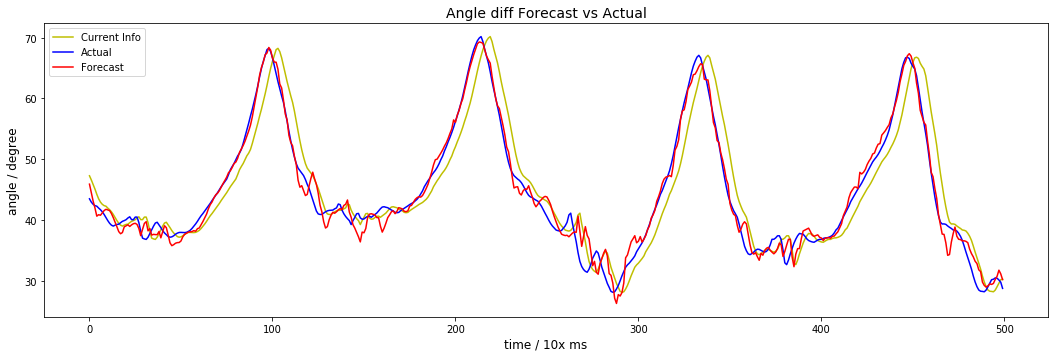

In [55]:
start = 8000
end = 8500

mcupred = mcu_test4[100:-5,7]
mcu_x = mcu_test4[100:-5,0] -mcu_test4[100:-5,2]
mcu_y = mcu_test4[100+5:,0] - mcu_test4[100+5:,2] 
mse = np.mean(np.square(mcupred[start:end] - mcu_y[start:end]))
print("MSE =",mse,"degree")

naivey1 = mcu_test4[100:-5,0] - mcu_test4[100:-5,2]
mse = np.mean(np.square(naivey1[start:end] - mcu_y[start:end]))
print("Naive 1 MSE =",mse,"degree")

naivey2 = mcu_test4[100:-5,0] - mcu_test4[100:-5,2] + (mcu_test4[100:-5,1] - mcu_test4[100:-5,3]) * 0.05
mse = np.mean(np.square(naivey2[start:end] - mcu_y[start:end]))
print("Naive 2 MSE =",mse,"degree")

plt.figure(1,figsize = (18,1*5.4))
plt.title("Angle diff Forecast vs Actual",fontsize = 14)
plt.xlabel('time / 10x ms',fontsize = 'large')
plt.ylabel('angle / degree',fontsize = 'large')

plt.plot(pd.Series(mcu_x[start:end]),'y-',markersize = 1,label = 'Current Info')
plt.plot(pd.Series(np.ravel(mcu_y[start:end])),"b-",markersize = 1,label = 'Actual')
plt.plot(pd.Series(np.ravel(mcupred[start:end])),"r-",markersize = 1,label = 'Forecast')
plt.legend(loc = "upper left")
plt.show()

(16375, 8)


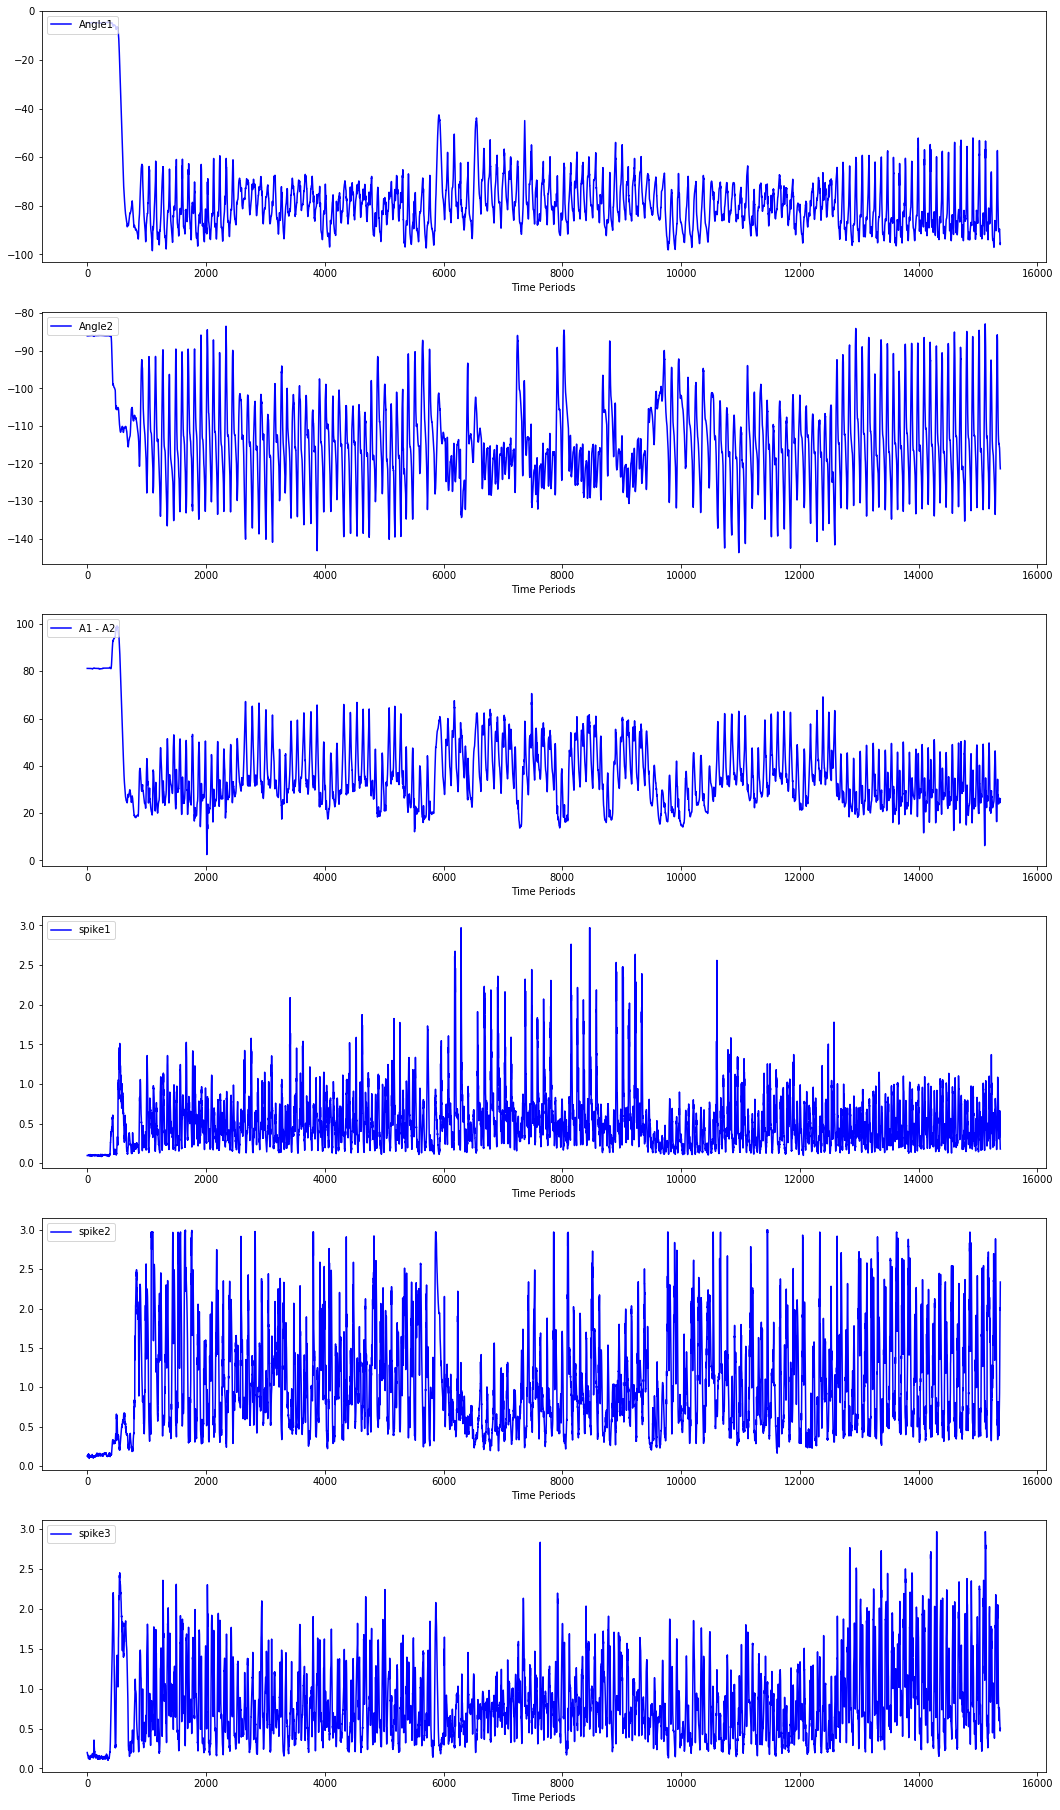

In [18]:
mcu_test5 = srtp.read_data("SRTP_Mea_2_2\\MCU_Test_4.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)
srtp.main_visualize(mcu_test5,1000,50000,color = 'b',line_type = '-')

In [40]:
start = 0
end = 50000

mcupred = mcu_test5[100:-5,7]

mcu_y = mcu_test5[100+5:,0] - mcu_test5[100+5:,2] 
mse = np.mean(np.square(mcupred[start:end] - mcu_y[start:end]))

mse

3.4774968838352796

MSE = 3.752835892501659
Naive 1 MSE = 15.160793563370934
Naive 2 MSE = 12.791829794857335


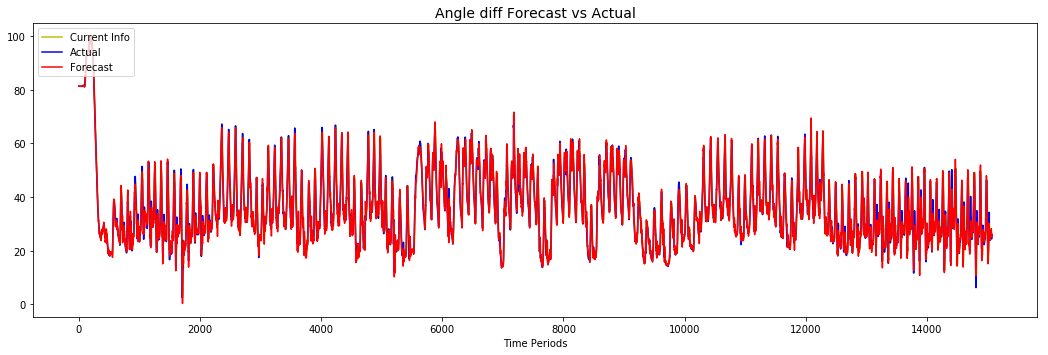

In [49]:
start = 1200
end = 50000

mcupred = mcu_test5[100:-5,7]
mcu_x = mcu_test5[100:-5,0] - mcu_test5[100:-5,2]
mcu_y = mcu_test5[100+5:,0] - mcu_test5[100+5:,2] 
mse = np.mean(np.square(mcupred[start:end] - mcu_y[start:end]))

print("MSE =",mse)

naivey1 = mcu_test5[100:-5,0] - mcu_test5[100:-5,2]
mse = np.mean(np.square(naivey1[start:end] - mcu_y[start:end]))
print("Naive 1 MSE =",mse)

naivey2 = mcu_test5[100:-5,0] - mcu_test5[100:-5,2] + (mcu_test5[100:-5,1] - mcu_test5[100:-5,3]) * 0.05
mse = np.mean(np.square(naivey2[start:end] - mcu_y[start:end]))
print("Naive 2 MSE =",mse)

plt.figure(1,figsize = (18,1*5.4))
plt.title("Angle diff Forecast vs Actual",fontsize = 14)

plt.plot(pd.Series(mcu_x[start:end]),'y-',markersize = 1,label = 'Current Info')
plt.plot(pd.Series(np.ravel(mcu_y[start:end])),"b-",markersize = 1,label = 'Actual')
plt.plot(pd.Series(np.ravel(mcupred[start:end])),"r-",markersize = 1,label = 'Forecast')
plt.legend(loc = "upper left")
plt.xlabel("Time Periods")
plt.show()

## Data Preprocessing (Normalizing and Arranging)

In [19]:
num_periods = 1080
f_horizon = 5

In [20]:
mean1 = -80 
std1 = 15 
meanw1 = 0
stdw1 = 75

mean2 = -110
std2 = 15
meanw2 = 0
stdw2 = 90

meany = 35
stdy = 15

In [29]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['data'+str(i)].copy()
    temp1 = data_dict['data' + str(i)][f_horizon:,0]
    temp2 = data_dict['data' + str(i)][f_horizon:,2]
    data_dict['truey' + str(i)] = (temp1 - temp2).reshape(-1,1)
    data_dict['normalizeddata' + str(i)][:,0] = (data_dict['data' + str(i)][:,0] - mean1) / std1
    data_dict['normalizeddata' + str(i)][:,1] = (data_dict['data' + str(i)][:,1] - meanw1) / stdw1
    data_dict['normalizeddata' + str(i)][:,2] = (data_dict['data' + str(i)][:,2] - mean2) / std2
    data_dict['normalizeddata' + str(i)][:,3] = (data_dict['data' + str(i)][:,3] - meanw2) / stdw2
    data_dict['normalizeddata' + str(i)][:,4] = data_dict['data' + str(i)][:,4] / 3
    data_dict['normalizeddata' + str(i)][:,5] = data_dict['data' + str(i)][:,5] / 3
    data_dict['normalizeddata' + str(i)][:,6] = data_dict['data' + str(i)][:,6] / 3

In [30]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['normalizeddata' + str(i)][:-f_horizon,:]
    data_dict['truey' + str(i)] = (data_dict['truey' + str(i)] - meany)/stdy

In [31]:
test_length = 4000;
breakpointset = [8000,22000,11397,5000,12000,13017,3000,12701,6033,3768,5654,39301,32575];
for i in range(1,filenum + 1):
    #breakpoint = np.random.randint(1100,data_dict['data'+str(i)].shape[0]-1200-test_length);
    if(i>len(breakpointset) or breakpointset[i-1] == None):
        breakpoint = np.random.randint(1100,data_dict['data'+str(i)].shape[0]-1200-test_length);
    else:
        breakpoint = breakpointset[i-1]
    print(breakpoint)
    data_dict['testx' + str(i)] = data_dict['normalizeddata' + str(i)][breakpoint:breakpoint+test_length,:].copy()
    data_dict['testy' + str(i)] = data_dict['truey' + str(i)][breakpoint:breakpoint+test_length,:].copy()
    data_dict['datax' + str(2*i - 1)] = data_dict['normalizeddata' + str(i)][:breakpoint,:].copy()
    data_dict['datay' + str(2*i - 1)] = data_dict['truey' + str(i)][:breakpoint,:].copy()
    data_dict['datax' + str(2*i)] = data_dict['normalizeddata'+str(i)][breakpoint + test_length:,:].copy()
    data_dict['datay' + str(2*i)] = data_dict['truey' + str(i)][breakpoint+test_length:,:].copy()

8000
22000
11397
5000
12000
13017
3000
12701
6033
3768
5654


## Training With Tensorflow Using the new Model

params_list = srtp.train_model(data_dict,is_new = False,ckptname = 'new_2_7_0.01emg_beta_0.00003_ration_1',
                          learning_rate = 0.0003,beta = 0.00003,epochs = 2001,
                          ration = 1,cluster_num = 64,filenum = filenum,saver_name = None)

In [37]:
params_list = srtp.train_model(data_dict,is_new = False,ckptname = 'new_2_7_0.01emg_beta_0.00003_ration_1',
                          learning_rate = 0.000003,beta = 0.00003,epochs = 1,
                          ration = 1,cluster_num = 64,filenum = filenum,saver_name = None)

INFO:tensorflow:Restoring parameters from ckptset\new_2_7_0.01emg_beta_0.00003_ration_1
0 	MSE: 0.012980245053768158


## Verify with Numpy cooperated with other algorithms

3768
RNN mse: 3.52113995745
RNN normalized mse 0.015649510922
Fourth order 0.00225804465334
naive mse: 21.2074287321
naive guess: 0.1


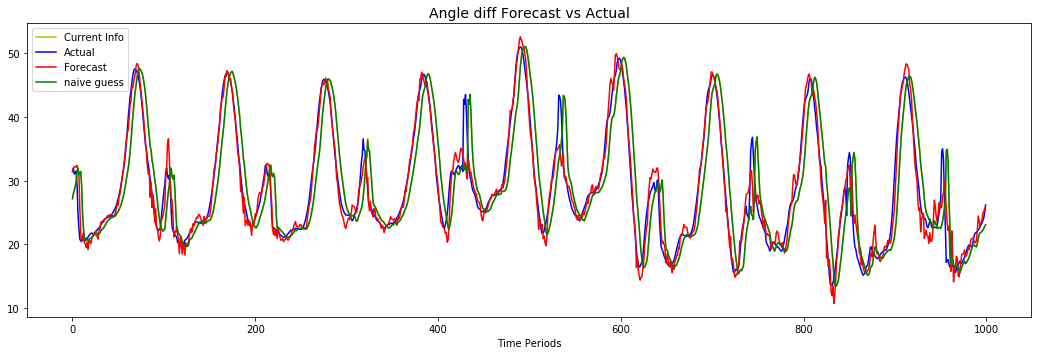

In [53]:
setting = 'data'
index = 10

start = 1000
end = 2000

print(breakpointset[index - 1])

testx = data_dict[setting + 'x' + str(index)][:,:].copy()
testy = data_dict[setting + 'y' + str(index)][:,:]
srtp.verify_divid_and_join(testx,testy,start,end,
                           params_list,1,printout = True,
                           Q_angle = 0.004,Q_omega = 0.04,
                           R = 0.00001,alpha = 0.0001);

In [44]:
srtp.total_verify(params_list,data_dict,filenum,
                  setting = 'test',start = 1000,end = 50000,
                  Q_angle = 0.004,Q_omega = 0.04,R = 1,alpha = 0.001);

On Test set:
0.0160171528853
0.00527275933441


In [43]:
srtp.total_verify(params_list,data_dict,filenum,
                  setting = 'data',start = 1000,end = 50000,
                  Q_angle = 0.004,Q_omega = 0.04,R = 0.00001,alpha = 0.001);

On Training set
0.0139654616992
0.0035987371477


In [49]:
0.016*225

3.6